In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

In [6]:
df = pd.read_csv('../data/synthetic_landslide_data.csv')

df.head()

,date,latitude,longitude,elevation,slope,aspect,rainfall_daily,rainfall_monthly,distance_to_faults,soil_depth,vegetation_density,land_use,lithology,earthquake_magnitude,soil_moisture,human_activity,previous_landslides,snow_melt,landslide_probability,landslide_occurred
0,2010-01-01 00:00:00,35.374540,-117.419221,313.341117,4.954709,167.131635,13.806106,358.396355,1648.921963,0.564493,0.666758,grassland,shale,0.495155,0.290954,medium,1,5.323220,0.358061,1
1,2010-01-02 00:00:00,35.950714,-117.473028,662.109551,25.411537,240.695889,8.313864,66.634938,1424.392558,2.297180,0.255508,grassland,sandstone,0.832004,0.756762,low,2,3.132095,0.492766,1
2,2010-01-03 00:00:00,35.731994,-117.648963,336.926716,12.871936,335.928406,17.550534,190.200182,1974.169908,0.674668,0.639101,barren,granite,1.012261,0.363341,low,3,5.787550,0.466611,0
3,2010-01-04 00:00:00,35.598658,-117.506787,503.630138,22.494591,251.689357,1.981876,203.190102,3605.233326,1.212526,0.569087,urban,limestone,0.370147,0.391899,low,2,2.488927,0.387058,1
4,2010-01-05 00:00:00,35.156019,-117.634903,429.236059,7.870809,290.781909,9.843717,509.185739,167.048376,0.733116,0.450279,agriculture,sandstone,0.306481,0.146308,high,7,4.460977,0.417247,1


In [7]:
df.dtypes

date                      object
latitude                 float64
longitude                float64
elevation                float64
slope                    float64
aspect                   float64
rainfall_daily           float64
rainfall_monthly         float64
distance_to_faults       float64
soil_depth               float64
vegetation_density       float64
land_use                  object
lithology                 object
earthquake_magnitude     float64
soil_moisture            float64
human_activity            object
previous_landslides        int64
snow_melt                float64
landslide_probability    float64
landslide_occurred         int64
dtype: object

In [8]:
df = df.drop(['date', 'latitude', 'longitude'], axis=1)

df.columns

Index(['elevation', 'slope', 'aspect', 'rainfall_daily', 'rainfall_monthly',
       'distance_to_faults', 'soil_depth', 'vegetation_density', 'land_use',
       'lithology', 'earthquake_magnitude', 'soil_moisture', 'human_activity',
       'previous_landslides', 'snow_melt', 'landslide_probability',
       'landslide_occurred'],
      dtype='object')

In [9]:
df.isnull().sum()

elevation                0
slope                    0
aspect                   0
rainfall_daily           0
rainfall_monthly         0
distance_to_faults       0
soil_depth               0
vegetation_density       0
land_use                 0
lithology                0
earthquake_magnitude     0
soil_moisture            0
human_activity           0
previous_landslides      0
snow_melt                0
landslide_probability    0
landslide_occurred       0
dtype: int64

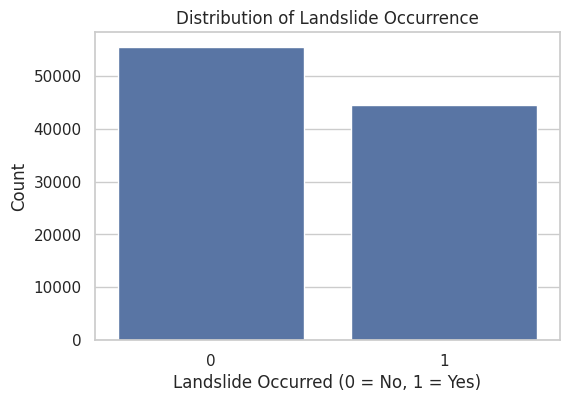

In [11]:
# Visualizeing the distribution of the target variable 'landslide_occurred'
plt.figure(figsize=(6, 4))
sns.countplot(x='landslide_occurred', data=df)
plt.title('Distribution of Landslide Occurrence')
plt.xlabel('Landslide Occurred (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

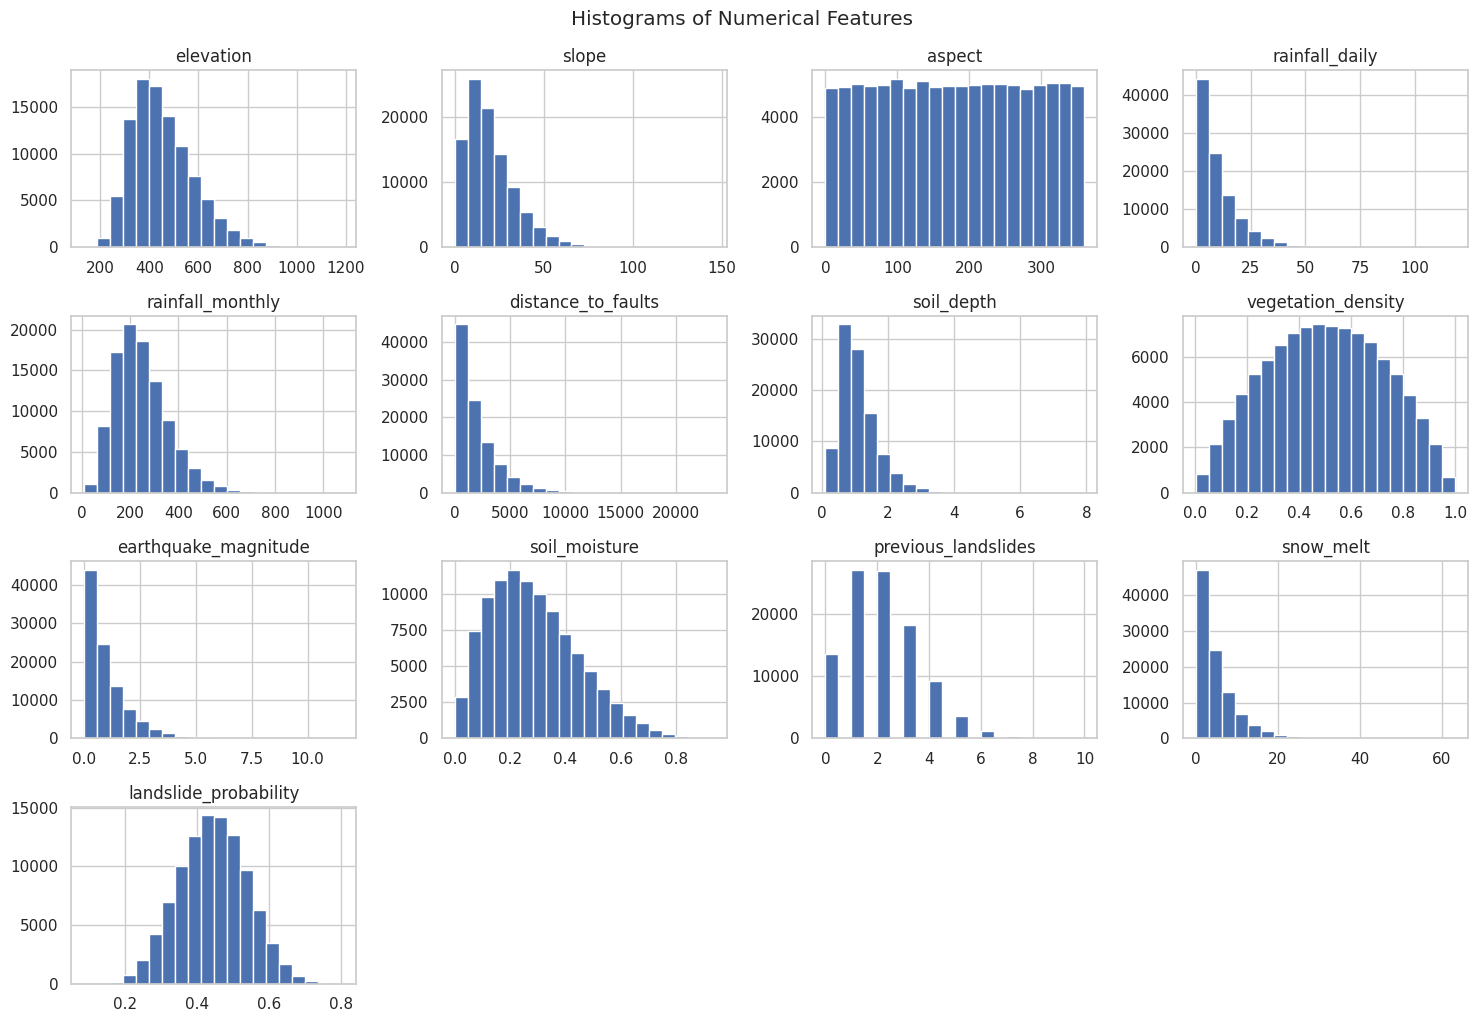

In [12]:
# Selecting numerical features, excluding the target variable
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.drop('landslide_occurred')

# histograms to see the distribution of numerical features
df[numerical_features].hist(bins=20, figsize=(15, 10), layout=(4, 4))
plt.tight_layout()
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.show()

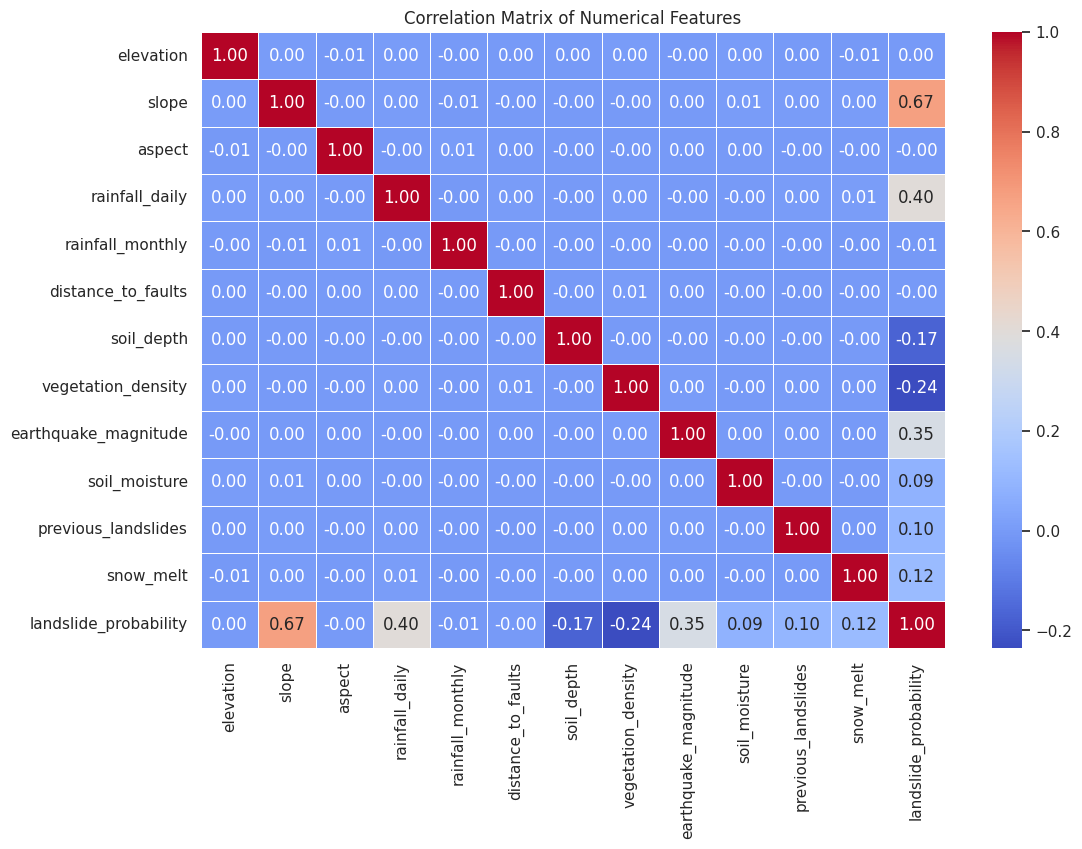

In [13]:
# Computeing the correlation matrix for numerical features
corr_matrix = df[numerical_features].corr()

# heatmap to visualizeing correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

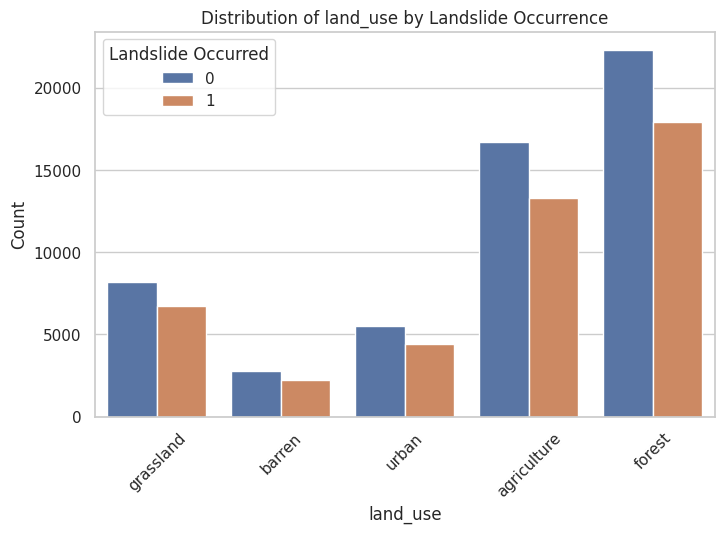

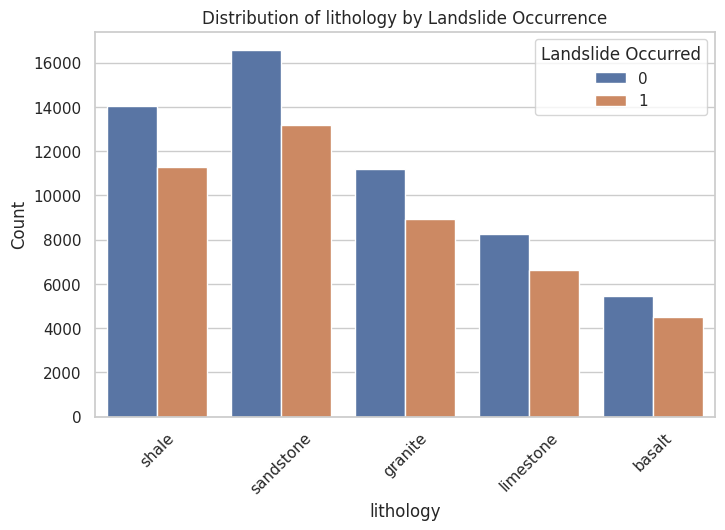

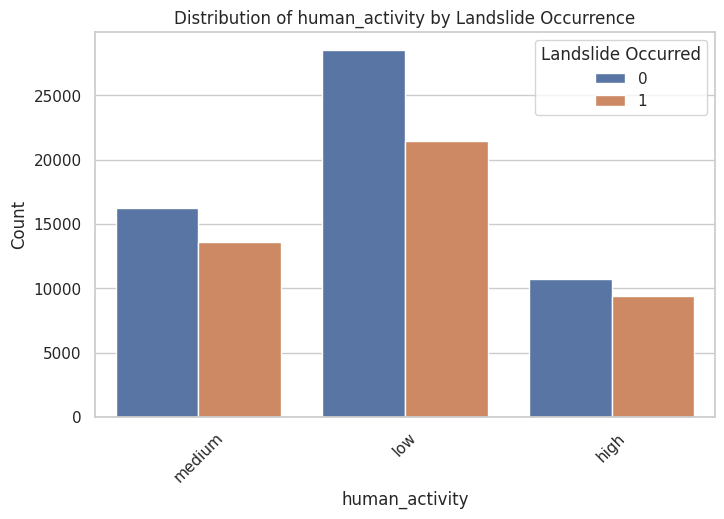

In [15]:
# categorical features based on the dataset
categorical_features = ['land_use', 'lithology', 'human_activity']

# bar plots for each categorical feature against the target variable
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, hue='landslide_occurred', data=df)
    plt.title(f'Distribution of {feature} by Landslide Occurrence')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Landslide Occurred')
    plt.xticks(rotation=45)  # Rotate x-labels (labels are long)
    plt.show()

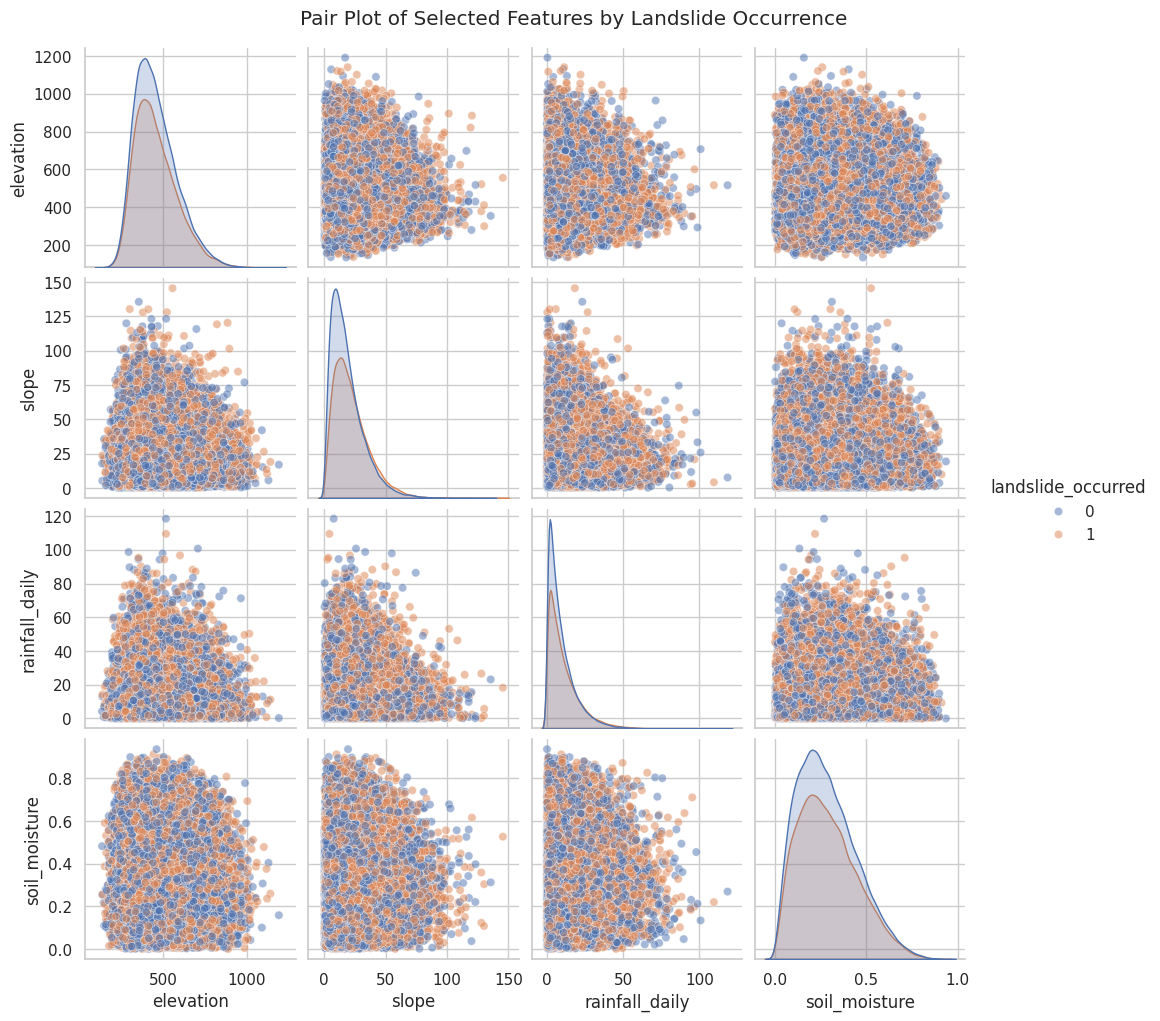

In [16]:
# Selecting a subset of key numerical features and the target for pair plotting
subset_features = ['elevation', 'slope', 'rainfall_daily', 'soil_moisture', 'landslide_occurred']

# pair plot to visualize relationships, colored by the target
sns.pairplot(df[subset_features], hue='landslide_occurred', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of Selected Features by Landslide Occurrence', y=1.02)
plt.show()

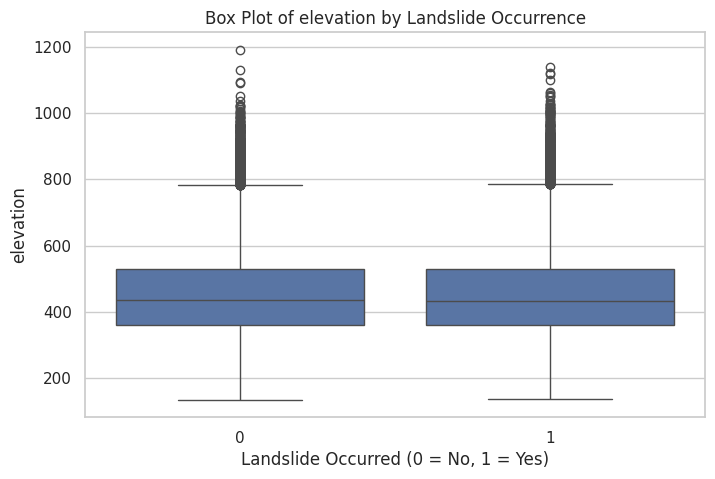

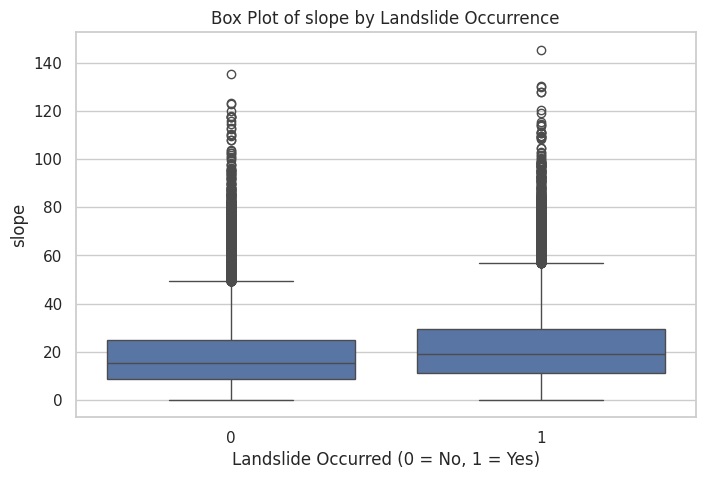

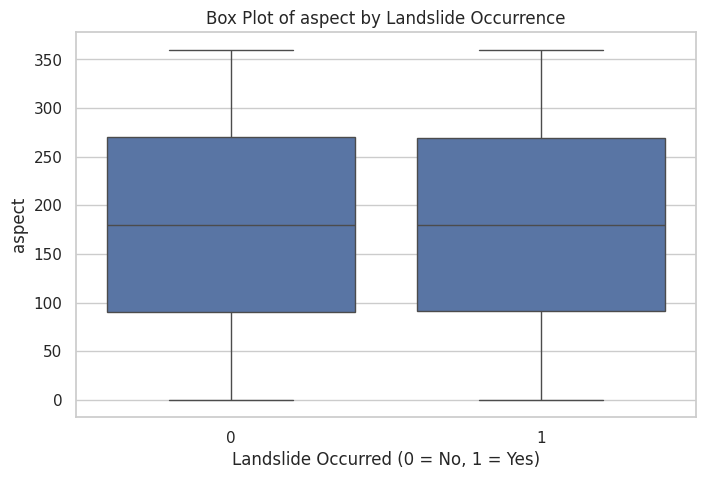

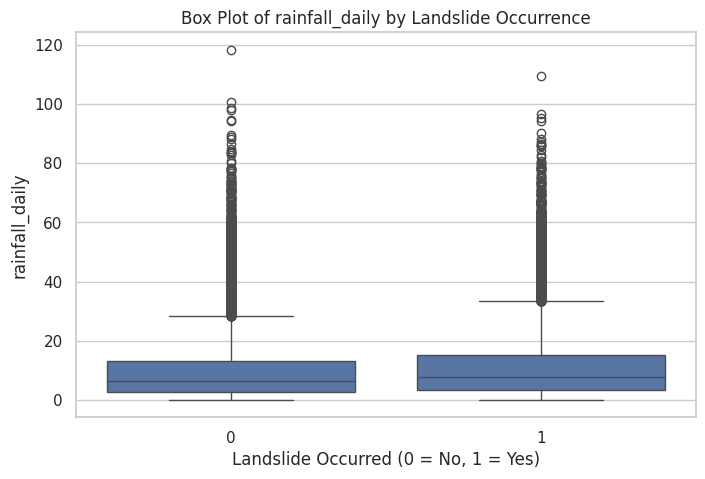

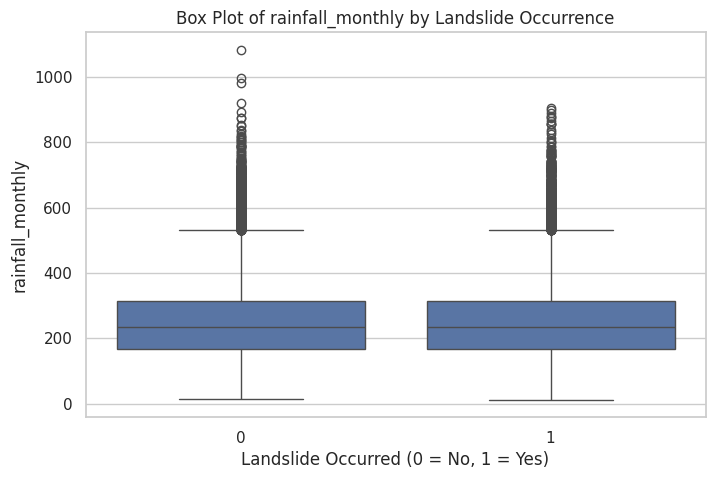

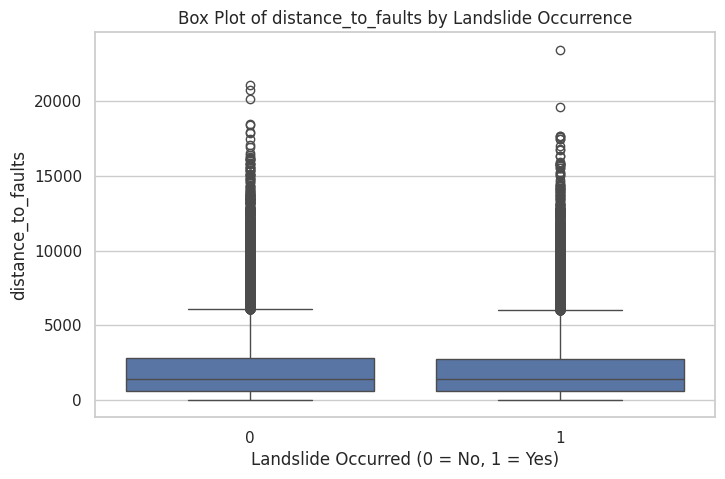

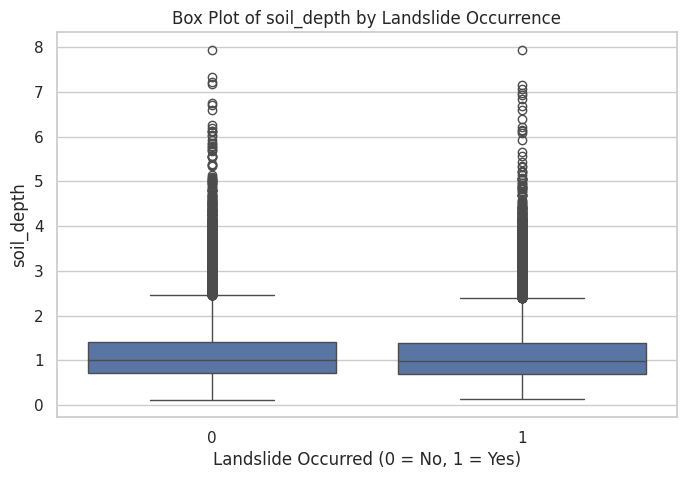

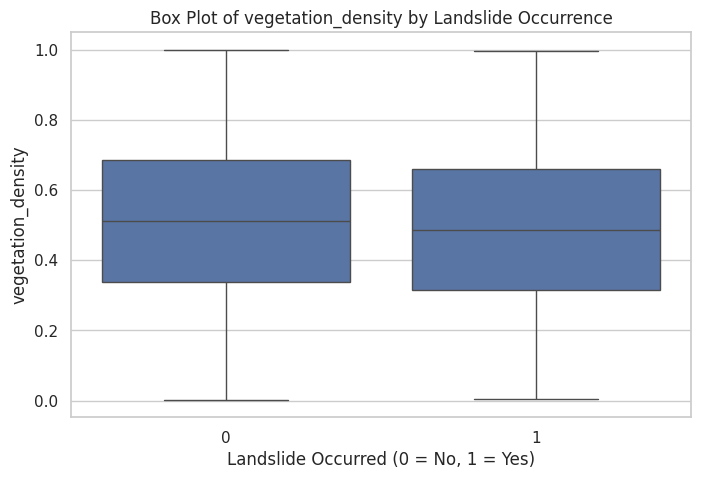

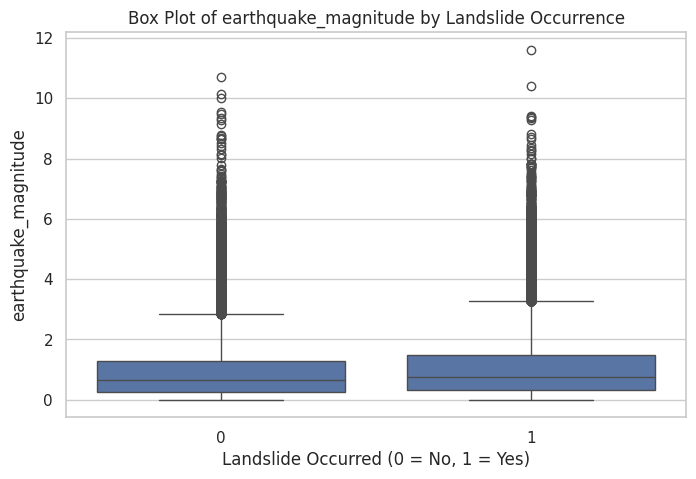

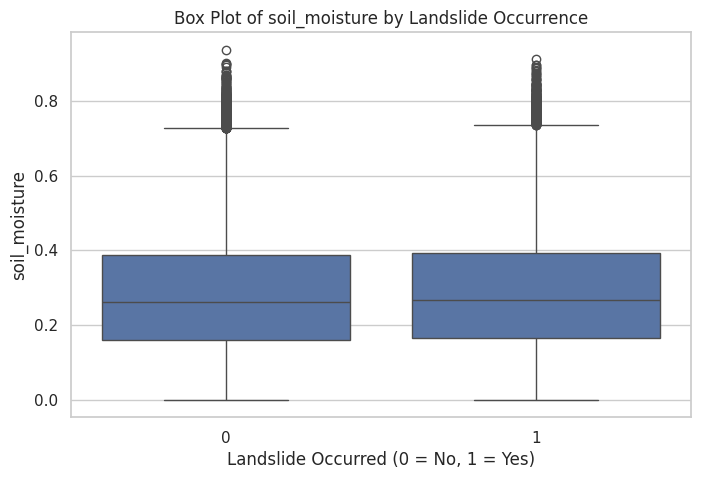

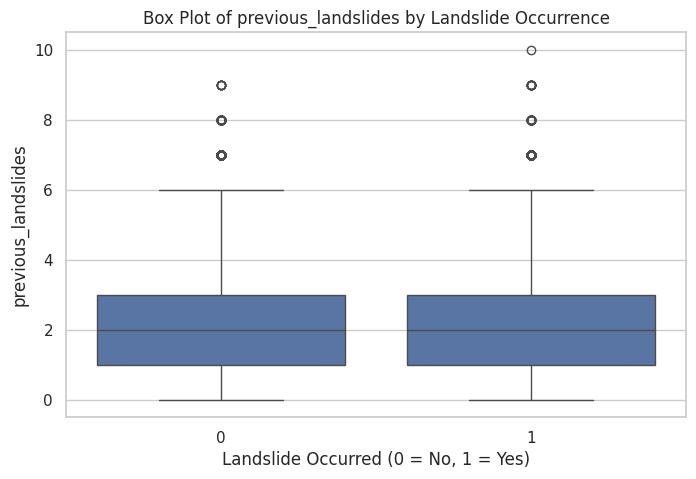

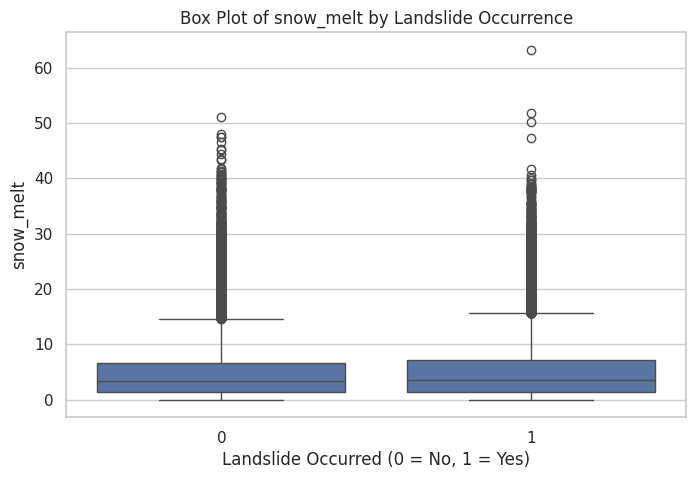

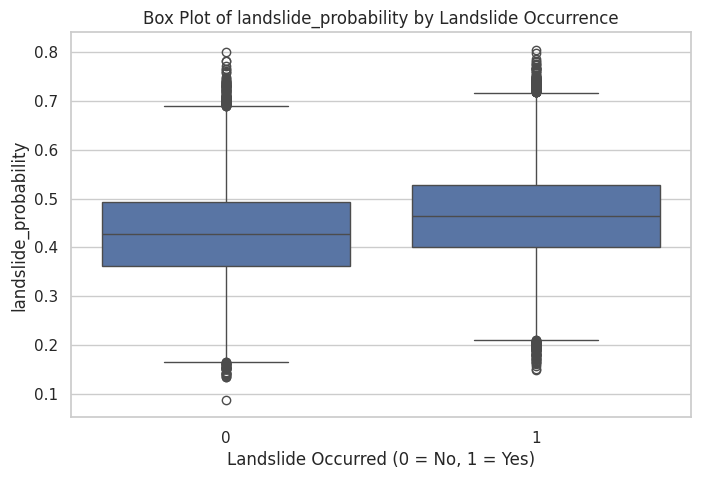

In [18]:
# box plots to detect outliers and compare distributions by target
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='landslide_occurred', y=feature, data=df)
    plt.title(f'Box Plot of {feature} by Landslide Occurrence')
    plt.xlabel('Landslide Occurred (0 = No, 1 = Yes)')
    plt.ylabel(feature)
    plt.show()

In [19]:
df[numerical_features].describe()

,elevation,slope,aspect,rainfall_daily,rainfall_monthly,distance_to_faults,soil_depth,vegetation_density,earthquake_magnitude,soil_moisture,previous_landslides,snow_melt,landslide_probability
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,454.590953,20.010032,180.165858,10.068128,249.604592,1992.689856,1.131466,0.500699,1.002237,0.286092,2.004690,4.987681,0.443755
std,126.580049,14.130988,103.771578,10.057675,111.387496,1994.937344,0.602245,0.224096,1.002290,0.159878,1.415114,5.009867,0.094738
min,135.153564,0.038401,0.016160,0.000008,11.657650,0.025074,0.117124,0.002635,0.000021,0.000117,0.000000,0.000027,0.087553
25%,360.653461,9.600865,90.562038,2.882703,168.203290,572.675105,0.712137,0.326754,0.288584,0.162192,1.000000,1.427905,0.377634
50%,434.537769,16.795734,180.119179,7.000407,233.125377,1378.710399,0.999915,0.500697,0.695938,0.264681,2.000000,3.428492,0.444069
75%,529.802162,26.978983,269.823270,13.975787,313.136973,2761.491309,1.400155,0.674520,1.386223,0.388939,3.000000,6.901024,0.509611
max,1190.632545,145.459191,359.996412,118.438122,1082.857302,23456.976096,7.941066,0.999890,11.606368,0.936416,10.000000,63.237817,0.805425


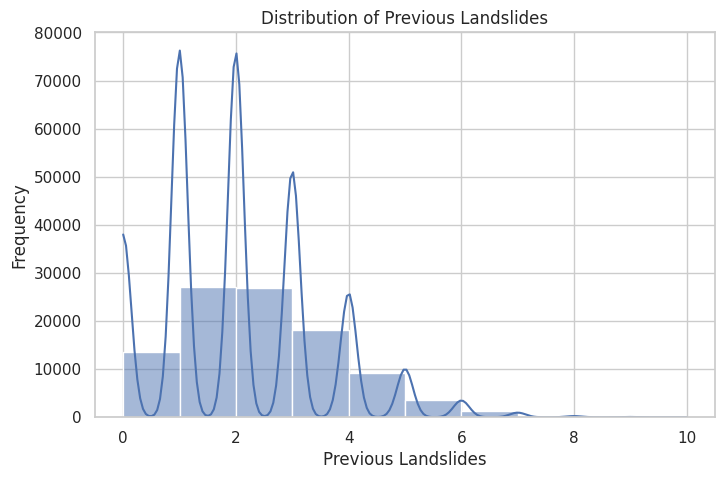

In [22]:
# Histogram of 'previous_landslides'
plt.figure(figsize=(8, 5))
sns.histplot(df['previous_landslides'], bins=10, kde=True)
plt.title('Distribution of Previous Landslides')
plt.xlabel('Previous Landslides')
plt.ylabel('Frequency')
plt.show()

In [30]:
'''def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers

outliers = detect_outliers_iqr(df, 'rainfall_daily')
print(f"Number of outliers in 'rainfall_daily': {len(outliers)}")

# Visualizeing with a box plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='rainfall_daily', data=df)
plt.title('Box Plot of Rainfall Daily')
plt.show()'''

'def detect_outliers_iqr(data, feature):\n    Q1 = data[feature].quantile(0.25)\n    Q3 = data[feature].quantile(0.75)\n    IQR = Q3 - Q1\n    lower_bound = Q1 - 1.5 * IQR\n    upper_bound = Q3 + 1.5 * IQR\n    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]\n    return outliers\n\noutliers = detect_outliers_iqr(df, \'rainfall_daily\')\nprint(f"Number of outliers in \'rainfall_daily\': {len(outliers)}")\n\n# Visualizeing with a box plot\nplt.figure(figsize=(8, 5))\nsns.boxplot(x=\'rainfall_daily\', data=df)\nplt.title(\'Box Plot of Rainfall Daily\')\nplt.show()'

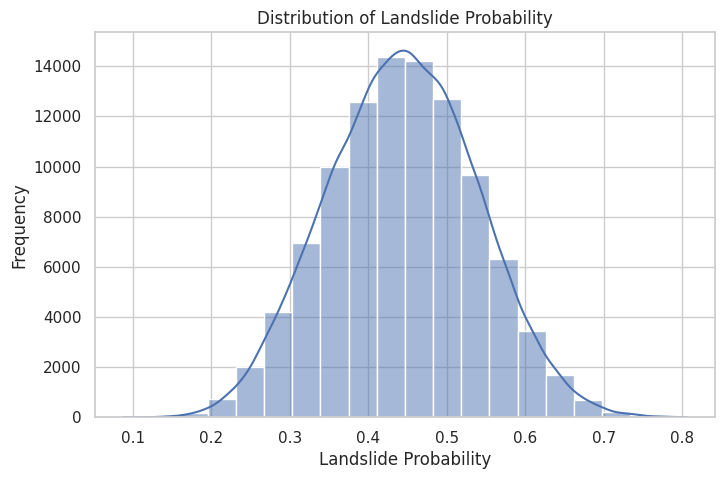

In [29]:
# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['landslide_probability'], bins=20, kde=True)
plt.title('Distribution of Landslide Probability')
plt.xlabel('Landslide Probability')
plt.ylabel('Frequency')
plt.show()